### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


### IMPORTING DATA

In [2]:
df=pd.read_csv("/home/apiiit-rkv/Desktop/medical_insurance/medical_insurance.csv")
df

,age,sex,bmi,children,smoker,alcoholic,disease,region,charges
0,19,female,22.9,0,yes,yes,diabetes,southwest,2019.14180
1,18,male,29.3,1,no,no,hypertension,southeast,3589.25670
2,28,male,26.2,3,no,yes,none,southeast,4449.46200
3,33,male,25.7,0,no,yes,heart disease,northwest,21984.47061
4,32,male,24.0,0,no,no,diabetes,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
2767,47,female,22.0,1,no,no,none,southeast,8569.86180
2768,21,female,21.1,0,no,yes,heart disease,southwest,2020.17700
2769,19,male,18.8,1,yes,no,diabetes,northwest,16450.89470
2770,23,male,16.9,0,no,yes,hypertension,northwest,21595.38229


### STATISTICS

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        2772 non-null   int64  
 1   sex        2772 non-null   object 
 2   bmi        2772 non-null   float64
 3   children   2772 non-null   int64  
 4   smoker     2772 non-null   object 
 5   alcoholic  2772 non-null   object 
 6   disease    2772 non-null   object 
 7   region     2772 non-null   object 
 8   charges    2772 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 195.0+ KB


In [4]:
df.describe()


,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,25.679401,1.101732,13256.679455
std,14.081459,6.512881,1.214806,12152.862832
min,18.000000,12.300000,0.000000,1121.873900
25%,26.000000,21.000000,0.000000,4687.444925
50%,39.000000,24.800000,1.000000,9304.701900
75%,51.000000,29.600000,2.000000,16486.225762
max,64.000000,53.000000,5.000000,63770.428010


In [5]:
df.isnull().sum()


age          0
sex          0
bmi          0
children     0
smoker       0
alcoholic    0
disease      0
region       0
charges      0
dtype: int64

### VISUALIZATION

#### PIE CHART

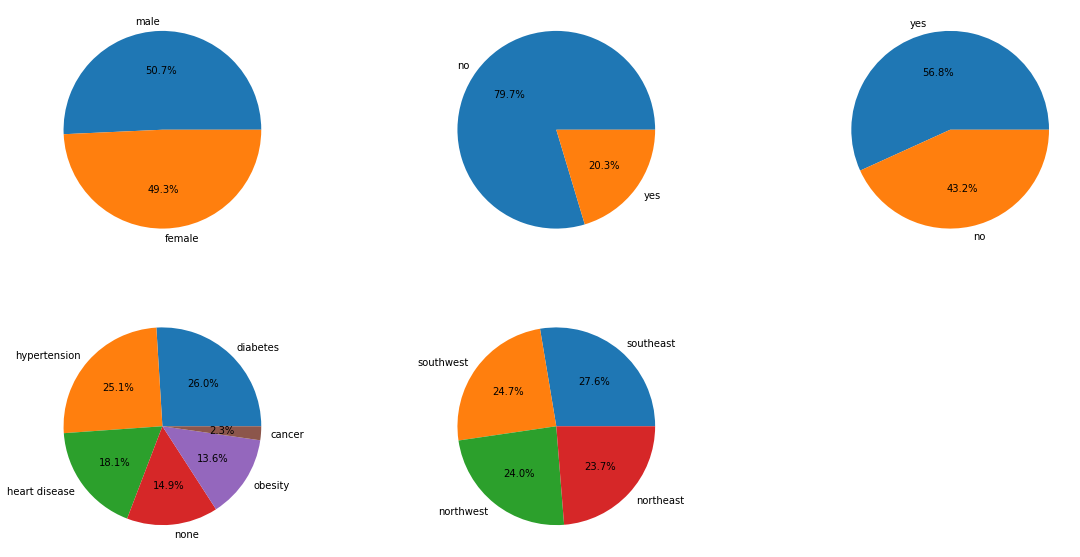

In [6]:
features=['sex','smoker','alcoholic','disease','region']
plt.subplots(figsize=(20,10))
for i,col in enumerate(features):
    plt.subplot(2,3,i+1)
    x=df[col].value_counts()
    plt.pie(x.values,labels=x.index,autopct='%1.1f%%')
plt.show()

#### BAR CHART

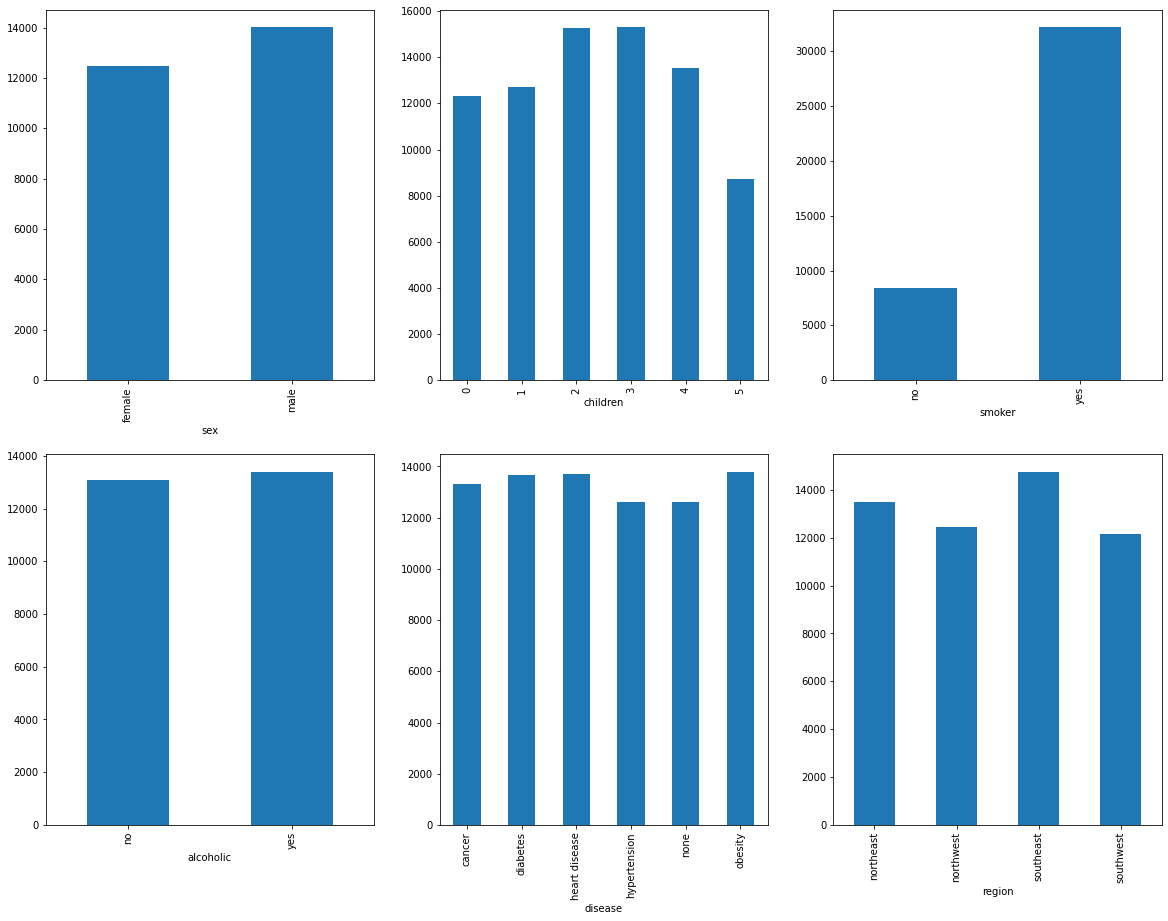

In [7]:
features=['sex','children','smoker','alcoholic','disease','region']
plt.subplots(figsize=(20,15))
for i ,col in enumerate(features):
    plt.subplot(2,3,i+1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()    

#### SCATTER PLOT

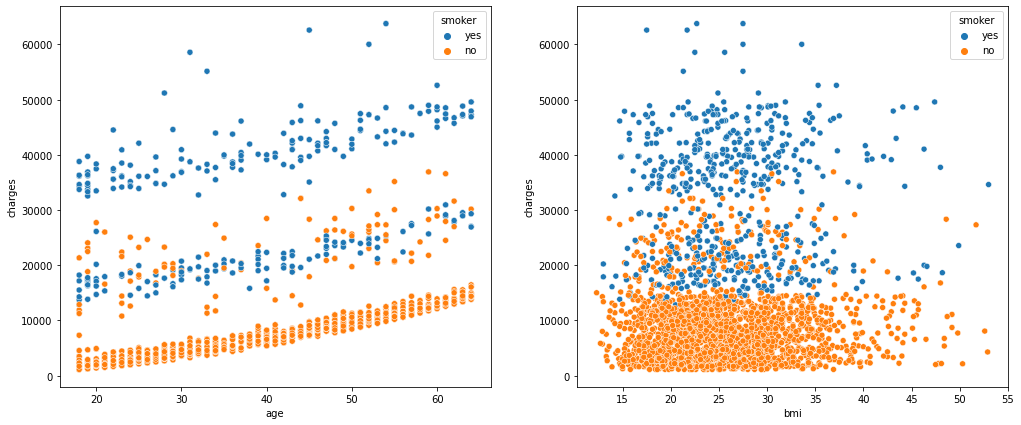

In [8]:
features=['age','bmi']
plt.subplots(figsize=(17,7))
for i,col in enumerate(features):
    plt.subplot(1,2,i+1)
    sns.scatterplot(data=df,x=col,y='charges',hue='smoker')
plt.show()    

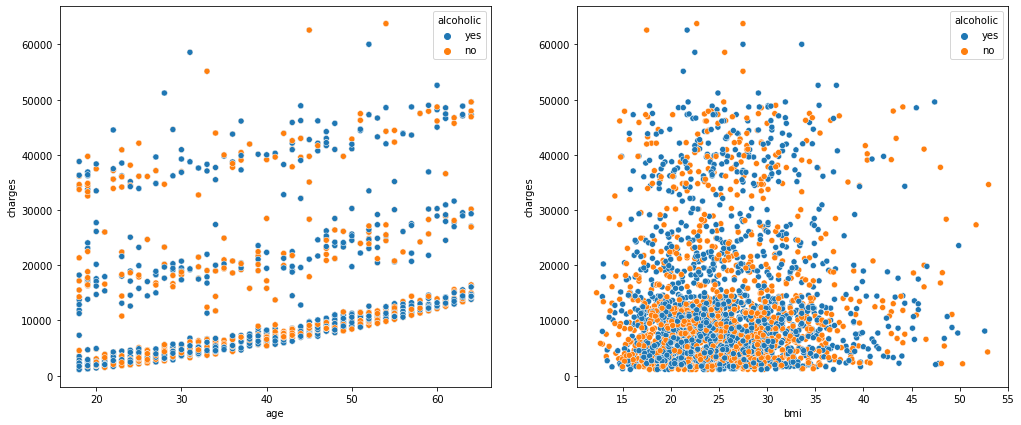

In [9]:
features=['age','bmi']
plt.subplots(figsize=(17,7))
for i,col in enumerate(features):
    plt.subplot(1,2,i+1)
    sns.scatterplot(data=df,x=col,y='charges',hue='alcoholic')
plt.show() 

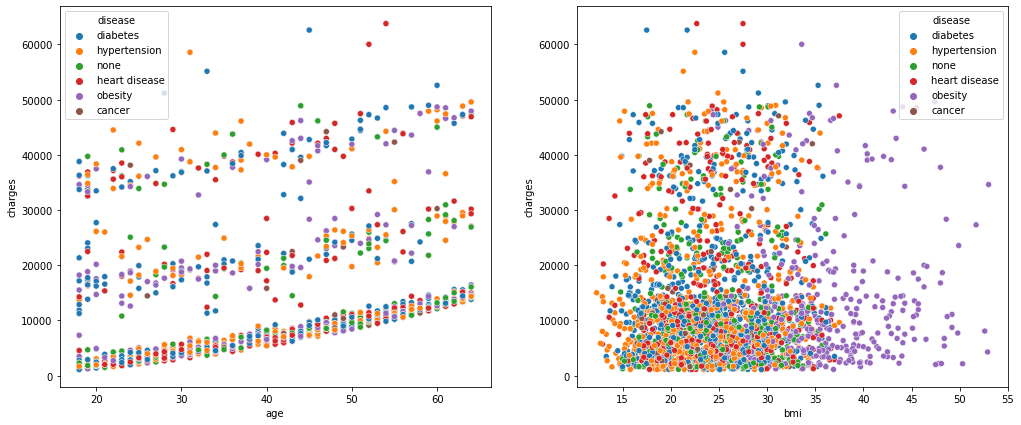

In [10]:
features=['age','bmi']
plt.subplots(figsize=(17,7))
for i,col in enumerate(features):
    plt.subplot(1,2,i+1)
    sns.scatterplot(data=df,x=col,y='charges',hue='disease')
plt.show() 

### DATA PREPROCESSING

In [11]:
df.drop_duplicates(inplace=True)

<AxesSubplot:>

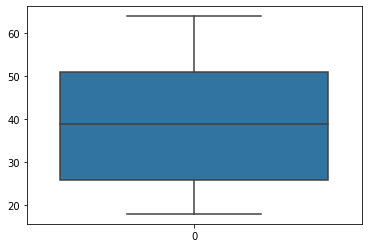

In [12]:
sns.boxplot(df['age'])

##### no outliers present in age column

<AxesSubplot:>

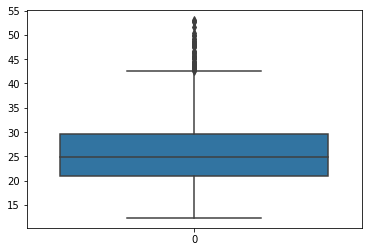

In [13]:
sns.boxplot(df['bmi'])

###### due to presence of outliers in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data

### OUTLIER TREATMENT

In [14]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

8.099999999999998
42.5


<AxesSubplot:>

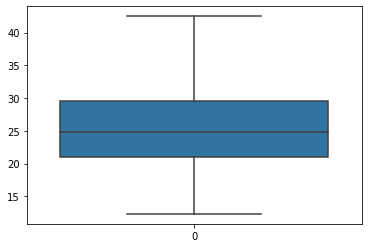

In [15]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':8.09999},
                           max_capping_dict={'bmi':42.5})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

### DATA WRANGLING

##### It is a technique to ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.

In [16]:
df['bmi'].skew()

0.5759561273184648

In [17]:
df['age'].skew()

0.0623184789516837

##### skew() is a function used to measure the asymmetry of the probability distribution of a real-valued random variable about its mean.
##### it is used to calculate skewness of the values along the specified axis

##### this will return skewness for each column of the dataframe.
##### is skewness value is:
##### 0:data is perfectly symmetric.
##### positive: distribution is right-skewed(long tail on the right)
##### negative: distribution is left-skewed(long tail on the left)

###### it is often used in exploratory data analysis to understand the shape of the distribution of data within a dataframe.

### Encoding:

##### encoding is to be done on discrete categorical data(bmi,sex,region)

In [19]:
df=pd.read_csv("/home/apiiit-rkv/Desktop/medical_insurance/medical_insurance.csv")
df['sex']=df['sex'].apply(lambda x: 1 if x== 'male' else 0)
df['smoker']=df['smoker'].apply(lambda x: 1 if x== 'yes' else 0)
df['alcoholic']=df['alcoholic'].apply(lambda x: 1 if x== 'yes' else 0)

disease_mapping={'none':0,'cancer':1,'diabetes':2,'heart disease':3,'hypertension':4,
                'obesity':5}
df['disease']=df['disease'].map(disease_mapping)

region_mapping={'northwest':0,'northeast':1,'southeast':2,'southwest':3}
                
df['region']=df['region'].map(region_mapping)
df

,age,sex,bmi,children,smoker,alcoholic,disease,region,charges
0,19,0,22.9,0,1,1,2,3,2019.14180
1,18,1,29.3,1,0,0,4,2,3589.25670
2,28,1,26.2,3,0,1,0,2,4449.46200
3,33,1,25.7,0,0,1,3,0,21984.47061
4,32,1,24.0,0,0,0,2,0,3866.85520
...,...,...,...,...,...,...,...,...,...
2767,47,0,22.0,1,0,0,0,2,8569.86180
2768,21,0,21.1,0,0,1,3,3,2020.17700
2769,19,1,18.8,1,1,0,2,0,16450.89470
2770,23,1,16.9,0,0,1,4,0,21595.38229


#### correlation matrix

In [20]:
df.corr()

,age,sex,bmi,children,smoker,alcoholic,disease,region,charges
age,1.000000,-0.026046,0.035530,0.037574,-0.023286,0.016055,-0.006403,0.003403,0.299144
sex,-0.026046,1.000000,-0.008182,0.016020,0.082326,-0.000519,-0.015670,0.012008,0.063333
bmi,0.035530,-0.008182,1.000000,0.021935,0.058805,-0.012523,0.303381,0.025276,0.054139
children,0.037574,0.016020,0.021935,1.000000,0.006362,0.008918,-0.014306,-0.004177,0.066832
smoker,-0.023286,0.082326,0.058805,0.006362,1.000000,0.010399,0.010679,0.008845,0.787811
alcoholic,0.016055,-0.000519,-0.012523,0.008918,0.010399,1.000000,-0.015998,-0.025496,0.012775
disease,-0.006403,-0.015670,0.303381,-0.014306,0.010679,-0.015998,1.000000,-0.018647,0.009118
region,0.003403,0.012008,0.025276,-0.004177,0.008845,-0.025496,-0.018647,1.000000,0.003962
charges,0.299144,0.063333,0.054139,0.066832,0.787811,0.012775,0.009118,0.003962,1.000000


### MODEL DEVELOPMENT

In [21]:
features=['age','sex','bmi','children','smoker','alcoholic','disease','region']
X=df[features]
Y=df[['charges']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

##### let’s train some state-of-the-art machine learning models on the training data and then use the validation data for choosing the best out of them for prediction.

### TRAINING AND EVALUATING MODELS

#### LINEAR REGRESSION

In [22]:
lrmodel=LinearRegression()
lrmodel.fit(X_train,Y_train)
ypredtrain0=lrmodel.predict(X_train)
ypredtest0=lrmodel.predict(X_test)
print("Train R^2 score:",r2_score(Y_train,ypredtrain0))
print("Test R^2 score:",r2_score(Y_test,ypredtest0))
print("CV R^2 score:",cross_val_score(lrmodel,X,Y,cv=5,).mean())


Train R^2 score: 0.727015203190243
Test R^2 score: 0.7119059816401363
CV R^2 score: 0.7222999200379537


#### SUPPORT VECTOR MACHINE REGRESSION

In [23]:

svrmodel=SVR()
svrmodel.fit(X_train,Y_train)
ypredtrain1=svrmodel.predict(X_train)
ypredtest1=svrmodel.predict(X_test)
print("Train R^2 score:",r2_score(Y_train,ypredtrain1))
print("Test R^2 score:",r2_score(Y_test,ypredtest1))
print("CV R^2 score:",cross_val_score(svrmodel,X,Y,cv=5,).mean())

Train R^2 score: -0.10490522100119537
Test R^2 score: -0.07131568892545337
CV R^2 score: -0.1032837734981217


#### RANDOM FOREST REGRESSION

In [24]:
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(X_train,Y_train)
ypredtrain2=rfmodel.predict(X_train)
ypredtest2=rfmodel.predict(X_test)
print("Train R^2 score:",r2_score(Y_train,ypredtrain2))
print("Test R^2 score:",r2_score(Y_test,ypredtest2))
print("CV R^2 score:",cross_val_score(rfmodel,X,Y,cv=5,).mean())
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,Y_train)
print("\nHyperparameter Tuning")
print(grid.best_params_)
rfmodel=RandomForestRegressor(random_state=42,n_estimators=150)
rfmodel.fit(X_train,Y_train)
ypredtrain2=rfmodel.predict(X_train)
ypredtest2=rfmodel.predict(X_test)
print("New_Train R^2 score:",r2_score(Y_train,ypredtrain2))
print("New_Test R^2 score:",r2_score(Y_test,ypredtest2))
print("New_CV R^2 score:",cross_val_score(rfmodel,X,Y,cv=5,).mean())

Train R^2 score: 0.9637645520706233
Test R^2 score: 0.7547217938972274
CV R^2 score: 0.7630097471903694

Hyperparameter Tuning
{'n_estimators': 150}
New_Train R^2 score: 0.9646385090498889
New_Test R^2 score: 0.7524248185709342
New_CV R^2 score: 0.7636825200983859


#### GRADIENT BOOSTING REGRESSION

In [25]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(X_train,Y_train)
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)
print("Train R^2 score:",r2_score(Y_train,ypredtrain3))
print("Test R^2 score:",r2_score(Y_test,ypredtest3))
print("CV R^2 score:",cross_val_score(gbmodel,X,Y,cv=5,).mean())
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,Y_train)
print("\nHyperparameter Tuning")
print(grid.best_params_)
gbmodel=GradientBoostingRegressor(n_estimators=19,learning_rate=0.2)
gbmodel.fit(X_train,Y_train)
ypredtrain3=gbmodel.predict(X_train)
ypredtest3=gbmodel.predict(X_test)
print("New_Train R^2 score:",r2_score(Y_train,ypredtrain3))
print("New_Test R^2 score:",r2_score(Y_test,ypredtest3))
print("New_CV R^2 score:",cross_val_score(gbmodel,X,Y,cv=5,).mean())

Train R^2 score: 0.785675228778904
Test R^2 score: 0.7428822370494459
CV R^2 score: 0.7391035744992117

Hyperparameter Tuning
{'learning_rate': 0.21, 'n_estimators': 21}
New_Train R^2 score: 0.7612445553005232
New_Test R^2 score: 0.7391152656934443
New_CV R^2 score: 0.7384278993661494


#### XGBOOST REGRESSION

In [26]:
xgmodel=XGBRegressor()
xgmodel.fit(X_train,Y_train)
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)
print("Train R^2 score:",r2_score(Y_train,ypredtrain4))
print("Test R^2 score:",r2_score(Y_test,ypredtest4))
print("CV R^2 score:",cross_val_score(xgmodel,X,Y,cv=5,).mean())
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],
            'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(X_train,Y_train)
print(grid.best_params_)
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(X_train,Y_train)
ypredtrain4=xgmodel.predict(X_train)
ypredtest4=xgmodel.predict(X_test)
print("New_Train R^2 score:",r2_score(Y_train,ypredtrain4))
print("New_Test R^2 score:",r2_score(Y_test,ypredtest4))
print("New_CV R^2 score:",cross_val_score(xgmodel,X,Y,cv=5,).mean())

Train R^2 score: 0.9771923819150907
Test R^2 score: 0.7327324543602939
CV R^2 score: 0.7223865296872478
{'gamma': 0, 'max_depth': 5, 'n_estimators': 15}
New_Train R^2 score: 0.7641531450881643
New_Test R^2 score: 0.7379422140113486
New_CV R^2 score: 0.7385061305335334


##### Out of all the models RandomForest regression model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.

In [27]:
print("Linear Regression Accuracy:",r2_score(Y_test,ypredtest0))
print("Support Vector Regression Accuracy:",r2_score(Y_test,ypredtest1))
print("Random Forest Regression Accuracy:",r2_score(Y_test,ypredtest2))
print("Gradient Boost Regression Accuracy:",r2_score(Y_test,ypredtest3))
print("XGBoost Regression Accuracy:",r2_score(Y_test,ypredtest4))

import joblib
joblib.dump(rfmodel, 'rfmodel.pkl')
joblib.dump(X_train.columns.tolist(), 'train_columns.pkl')

Linear Regression Accuracy: 0.7119059816401363
Support Vector Regression Accuracy: -0.07131568892545337
Random Forest Regression Accuracy: 0.7524248185709342
Gradient Boost Regression Accuracy: 0.7391152656934443
XGBoost Regression Accuracy: 0.7379422140113486


['train_columns.pkl']